<a href="https://colab.research.google.com/github/sambamford-bvtengineering/BVT_Engineering_Methods/blob/main/Standards%20Notebooks/Sam_copy_03_05_22_NZS_1170_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NZS 1170.5:2004 .py method

This method references the following standard:
NZS 1170.5:2004 (incorporating Amendment Nos 1), for New Zealand structures.

Method developed 28 August 2021
(c) BVT Consulting Ltd

Developed - MMB

Reviewed - SB

###Initialise  Dependents and Libraries


In [2]:
import pandas as pd
import numpy as np

#3 Site hazard spectra

##3.1.2 Spectral shape factor, $C_h(T)$

Given site subsoil class, period of vibration and spectral method (figure 3.1 or figure 3.2), this function returns the spectral shape factor. The function uses linear interpolation between table data points.

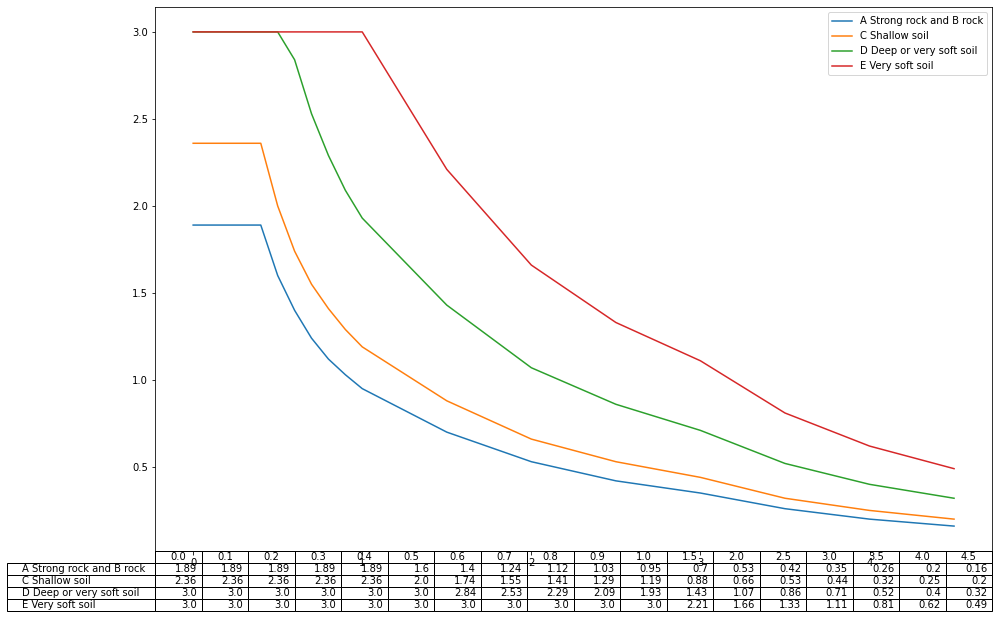

In [3]:
#@title Table 3.1 - Spectral shape factor, $C_h(T)$ - General { vertical-output: true }

table3_1 = pd.DataFrame(
{"A Strong rock and B rock":[1.89,1.89,1.89,1.89,1.89,1.60,1.40,1.24,1.12,1.03,0.95,0.70,0.53,0.42,0.35,0.26,0.20,0.16],
 "C Shallow soil":[2.36,2.36,2.36,2.36,2.36,2.00,1.74,1.55,1.41,1.29,1.19,0.88,0.66,0.53,0.44,0.32,0.25,0.20],
 "D Deep or very soft soil":[3.00,3.00,3.00,3.00,3.00,3.00,2.84,2.53,2.29,2.09,1.93,1.43,1.07,0.86,0.71,0.52,0.40,0.32],
 "E Very soft soil":[3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.21,1.66,1.33,1.11,0.81,0.62,0.49]

 },
 index = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5]
 )

table3_1.plot(table=True,figsize=(15, 10))

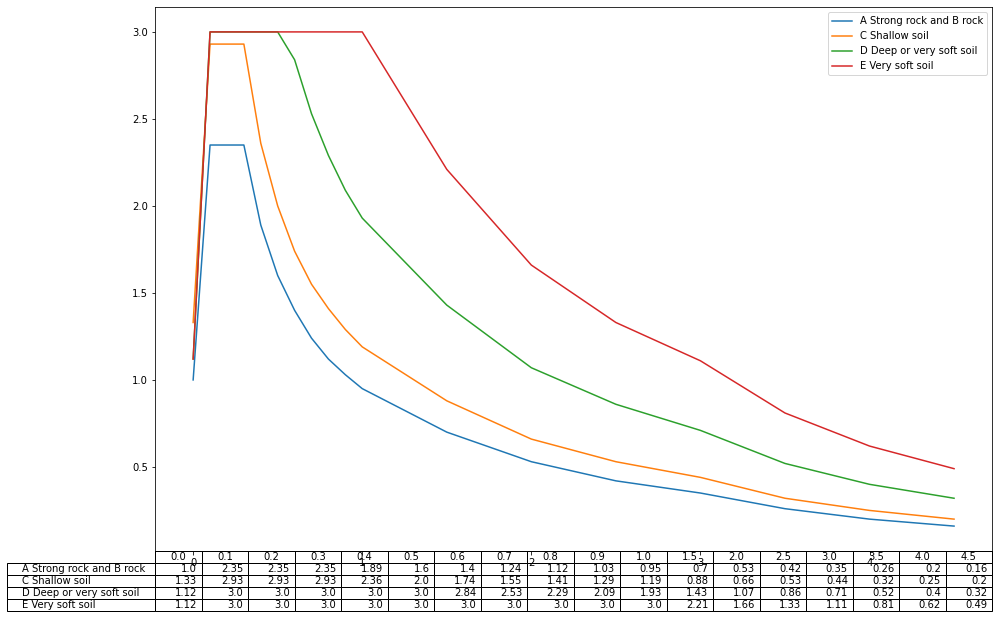

In [4]:
#@title Table 3.1(1) - Spectral shape factor, $C_h(T)$ - Modal analysis, numerical integration time history analysis, vertical loading and parts. { vertical-output: true }

table3_1_1 = pd.DataFrame(
{"A Strong rock and B rock":[1.00,2.35,2.35,2.35,1.89,1.60,1.40,1.24,1.12,1.03,0.95,0.70,0.53,0.42,0.35,0.26,0.20,0.16],
 "C Shallow soil":[1.33,2.93,2.93,2.93,2.36,2.00,1.74,1.55,1.41,1.29,1.19,0.88,0.66,0.53,0.44,0.32,0.25,0.20],
 "D Deep or very soft soil":[1.12,3.00,3.00,3.00,3.00,3.00,2.84,2.53,2.29,2.09,1.93,1.43,1.07,0.86,0.71,0.52,0.40,0.32],
 "E Very soft soil":[1.12,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.21,1.66,1.33,1.11,0.81,0.62,0.49]

 },
 index = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5]
 )

table3_1_1.plot(table=True,figsize=(15, 10))

In [5]:
#@title spectral_shape_factor(Subsoil_Type,T,spectral_method) { run: "auto", vertical-output: true }
#@markdown Subsoil Type
Subsoil_Type = "C Shallow soil" #@param ["A Strong rock and B rock", "C Shallow soil", "D Deep or very soft soil", "E Very soft soil"]
#@markdown Period of Vibration
T = 0 #@param {type:"number"}
#@markdown Spectral method
spectral_method = "modal, numerical, parts (table 3.2)" #@param ["General (table 3.1)", "modal, numerical, parts (table 3.2)"]




In [6]:
def spectral_shape_factor(Subsoil_Type,T,spectral_method):

    if spectral_method == "General (table 3.1)":
      table = table3_1
    else:
      table = table3_1_1

    #linear interpolation
    a = table.index.values
    b = table[Subsoil_Type].to_numpy()
    
    ChT = np.interp(T, a, b)

    return ChT

ChT = spectral_shape_factor(Subsoil_Type,T,spectral_method)
print("Spectral shape factor =",ChT)

Spectral shape factor = 1.33


##3.1.4 Hazard factor, $Z$, and shortest major fault distance, $D$

Given location, this function returns the hazard factor and major fault distance for that location.

In [7]:
#@title Table 3.3 - Z values and shortest major fault distances D for New Zealand locations { vertical-output: true }

table3_3 = pd.DataFrame([
['Akaroa',0.3,20,],
['Alexandra',0.21,20,],
['Arrowtown',0.3,20,],
['Arthurs Pass',0.6,12,],
['Ashburton',0.2,20,],
['Auckland',0.13,20,],
['Balclutha',0.13,20,],
['Blenheim',0.33,0,],
['Bluff',0.15,20,],
['Bulls',0.31,20,],
['Cambridge',0.18,20,],
['Cheviot',0.4,20,],
['Christchurch',0.3,20,],
['Cromwell ',0.24,20,],
['Dannevirke',0.42,10,],
['Darfield',0.3,20,],
['Dargaville',0.1,20,],
['Dunedin',0.13,20,],
['Eastbourne - Point Howard',0.4,4,],
['Fairlie',0.24,20,],
['Fielding',0.37,20,],
['Fox Glacier',0.44,2,],
['Foxton/Foxton Beach',0.36,20,],
['Franz Josef',0.44,2,],
['Geraldine',0.19,20,],
['Gisborne',0.36,20,],
['Gore',0.18,20,],
['Greymouth',0.37,20,],
['Hamilton',0.13,20,],
['Hanmer Springs',0.55,2,],
['Harihari',0.46,4,],
['Hastings',0.39,20,],
['Hawera',0.18,20,],
['Hokitika',0.45,20,],
['Huntly',0.15,20,],
['Hutt Valley - south of Taita Gorge',0.4,0,],
['Inglewood',0.17,20,],
['Invercargill',0.18,20,],
['Kaikohe',0.1,20,],
['Kaikoura',0.42,12,],
['Kaitaia',0.1,20,],
['Kawerau',0.29,20,],
['Levin',0.4,20,],
['Manukau City',0.13,20,],
['Mangakino',0.21,20,],
['Marton',0.3,20,],
['Masterton',0.42,6,],
['Matamata',0.19,20,],
['Mataura',0.17,20,],
['Milford Sound',0.54,20,],
['Morrinsville',0.18,20,],
['Mosgiel',0.13,20,],
['Motueka',0.26,20,],
['Mount Maunganui',0.2,20,],
['Mt Cook',0.38,20,],
['Murchison',0.34,20,],
['Murupara',0.3,20,],
['Napier',0.38,20,],
['Nelson',0.27,20,],
['New Plymouth',0.18,20,],
['Ngaruawahia',0.15,20,],
['Oamaru',0.13,20,],
['Oban',0.14,20,],
['Ohakune',0.27,20,],
['Opotiki',0.3,20,],
['Opunake',0.18,20,],
['Otaki',0.4,20,],
['Otira',0.6,3,],
['Otorohanga',0.17,20,],
['Paeroa',0.18,20,],
['Pahiatua',0.42,8,],
['Paihia/Russell',0.1,20,],
['Palmerston ',0.13,20,],
['Palmerston North',0.38,8,],
['Paraparaumu',0.4,14,],
['Patea',0.19,20,],
['Picton',0.3,16,],
['Porirua',0.4,8,],
['Pukekohe',0.13,20,],
['Putaruru',0.21,20,],
['Queenstown',0.32,20,],
['Raetihi',0.26,20,],
['Rangiora',0.33,20,],
['Reefton',0.37,20,],
['Riverton',0.2,20,],
['Rotorua',0.24,20,],
['Ruatoria',0.33,20,],
['Seddon',0.4,6,],
['Springs Junction',0.45,3,],
['St Arnaud',0.36,2,],
['Stratford',0.18,20,],
['Taihape',0.33,20,],
['Takaka ',0.23,20,],
['Taumarunui',0.21,20,],
['Taupo',0.28,20,],
['Tauranga',0.2,20,],
['Te Anau',0.36,20,],
['Te Aroha',0.18,20,],
['Te Awamutu',0.17,20,],
['Te Kuiti',0.18,20,],
['Te Puke',0.22,20,],
['Temuka',0.17,20,],
['Thames',0.16,20,],
['Timaru',0.15,20,],
['Tokoroa',0.21,20,],
['Turangi',0.27,20,],
['Twizel',0.27,20,],
['Upper Hutt',0.42,2,],
['Waihi',0.18,20,],
['Waikanae',0.4,15,],
['Waimate',0.14,20,],
['Wainuiomata',0.4,5,],
['Waiouru',0.29,20,],
['Waipawa',0.41,20,],
['Waipukurau',0.41,20,],
['Wairoa',0.37,20,],
['Waitara',0.18,20,],
['Waiuku',0.13,20,],
['Wanaka',0.3,20,],
['Wanganui',0.25,20,],
['Ward',0.4,4,],
['Warkworth',0.13,20,],
['Wellington ',0.4,0,],
['Wellington CBD (north of Basin Reserve)',0.4,2,],
['Westport',0.3,20,],
['Whakatane',0.3,20,],
['Whangarei',0.1,20,],
['Winton',0.2,20,],
['Woodville',0.41,2,]],
columns = ["Location","Z","D"]                       
)

table3_3

,Location,Z,D
0,Akaroa,0.30,20
1,Alexandra,0.21,20
2,Arrowtown,0.30,20
3,Arthurs Pass,0.60,12
4,Ashburton,0.20,20
...,...,...,...
124,Westport,0.30,20
125,Whakatane,0.30,20
126,Whangarei,0.10,20
127,Winton,0.20,20


In [8]:
#@title hazard_factor(location) { run: "auto", vertical-output: true }
location = "Auckland" #@param ['Akaroa','Alexandra','Arrowtown','Arthurs Pass','Ashburton','Auckland','Balclutha','Blenheim','Bluff','Bulls','Cambridge','Cheviot','Christchurch','Cromwell ','Dannevirke','Darfield','Dargarville','Dunedin','Eastbourne - Point Howard','Fairlie','Fielding','Fox Glacier','Foxton/Foxton Beach','Franz Josef','Geraldine','Gisborne','Gore','Greymouth','Hamilton','Hanmer Springs','Harihari','Hastings','Hawera','Hokitika','Huntly','Hutt Valley - south of Taita Gorge','Ingelwood','Invercargill','Kaikohe','Kaikoura','Kaitaia','Kawerau','Levin','Manakau City','Mangakino','Marton','Masterton','Matamata','Mataura','Milford Sound','Morrinsville','Mosgiel','Motueka','Mount Manunganui','Mt Cook','Murchison','Murupara','Napier','Nelson','New Plymouth','Ngaruawahia','Oamaru','Oban','Ohakune','Opotiki','Opunake','Otaki','Otira','Otorohanga','Paeroa','Pahiatua','Paihia/Russell','Palmerston ','Palmerston North','Paraparaumu','Patea','Picton','Porirua','Pukekohe','Putaruru','Queenstown','Raetihi','Rangiora','Reefton','Riverton','Rotorua','Ruatoria','Seddon','Springs Junction','St Arnaud','Stratford','Taihape','Takaka ','Taumaranui','Taupo','Tauranga','Te Anua','Te Aroha','Te Awamutu','Te Kuiti','Te Puke','Temuka','Thames','Timaru','Tokoroa','Turangi','Twizel','Upper Hutt','Waihi','Waikanae','Waimate','Wainiuomata','Waiouru','Waipawa','Waipukurau','Wairoa','Waitara','Waiuku','Wanaka','Wanganui','Ward','Warkworth','Wellington ','Wellington CBD (north of Basin Reserve)','Westport','Whakatane','Whangerei','Winton','Woodville']



In [9]:
def hazard_factor(location):

    Z = table3_3.loc[table3_3["Location"]==location,"Z"]
    Z = Z.squeeze()
    D = table3_3.loc[table3_3["Location"]==location,"D"]
    D = D.squeeze()

    return Z,D

Z,D = hazard_factor(location)

print("Hazard factor =",Z)
print("Major fault distance =",D)

Hazard factor = 0.13
Major fault distance = 20


##3.1.5 Return period factor $R$

Given the annual probability of exceedance, this function returns the return period factor.

In [10]:
#@title Table 3.5 { vertical-output: true }

table3_5 = pd.DataFrame(
    {"Required annual probability of exceedance":['1/2500','1/2000','1/1000','1/500','1/250','1/100','1/50','1/25','1/20'],
     "Rs or Ru":[1.8,1.7,1.3,1.0,0.75,0.5,0.35,0.25,0.20]}
)

table3_5

,Required annual probability of exceedance,Rs or Ru
0,1/2500,1.80
1,1/2000,1.70
2,1/1000,1.30
3,1/500,1.00
4,1/250,0.75
5,1/100,0.50
6,1/50,0.35
7,1/25,0.25
8,1/20,0.20


In [11]:
#@title return_period_factor(P) { run: "auto", vertical-output: true }
#@markdown Annual Probability of Exceedance:
P = "1/500" #@param ['1/2500','1/2000','1/1000','1/500','1/250','1/100','1/50','1/25','1/20']




In [12]:
def return_period_factor(P):

  R = table3_5.loc[table3_5["Required annual probability of exceedance"]==P,"Rs or Ru"].squeeze()

  return R

R = return_period_factor(P)

print("Return period factor =",return_period_factor(P))

Return period factor = 1.0


##3.1.6 Near fault factor, $N(T,D)$, modal, numerical integration and parts

Given the annual probability of exceedance, shortest major fault distance and the modal, numerical integration and parts period of vibration (table 3.1(1)), this function returns the near fault factor. This function interpolates values in table 3.7, and then uses the logic in clauses 3.1.6.1 and 3.1.6.2 to determine $N(T,D)$.

In [13]:
#@title Table 3.7 Maximum near-fault factors $N_{max}(T)$ { vertical-output: true }

table3_7 = pd.DataFrame(
    {'Period T (s)':[1.5,2,3,4,5],
     'Nmax(T)':[1.0,1.12,1.36,1.60,1.72]}
)

table3_7

,Period T (s),Nmax(T)
0,1.5,1.00
1,2.0,1.12
2,3.0,1.36
3,4.0,1.60
4,5.0,1.72


In [14]:
def near_fault_factor(P,D,T):

    #Find Nmax(T) from table 3.7

      if T <= 1.5:
          N_max = table3_7.loc[table3_7["Period T (s)"]==1.5,"Nmax(T)"].squeeze()
      if T >= 5:
          N_max = table3_7.loc[table3_7["Period T (s)"]==5.0,"Nmax(T)"].squeeze()
      else:
          b = table3_7["Period T (s)"].to_numpy()
          c = table3_7["Nmax(T)"].to_numpy()
    
          N_max = np.interp(T, b, c)
    
    #Find N(T,D) from clauses 3.1.6.1 and 3.1.6.2
      
      if P in ['1/25','1/50','1/100','1/150','1/250'] :
          N_TD = 1.0
      elif D >= 20 :
          N_TD = 1.0
      elif D > 2 :
          N_TD = 1 + (N_max - 1)*((20 - D )/18)
      elif D <= 2 :
          N_TD = N_max
      else: N_TD = 1.0

      return N_TD

N_TD = near_fault_factor(P,D,T)

print("Near fault factor =",N_TD)

Near fault factor = 1.0


##3.1.1 Elastic site spectra $C(T)$
Given the spectral shape factor, $C_h(T)$, the hazard factor, $Z$, the return period factor, $R$, and the near fault factor, $N(T,D)$, this function returns the elastic site hazard spectra, $C(T)$, also refered to as the site hazard coefficient.

$$C(T)=C_h(T)* Z* R* N(T,D)$$

In [15]:
def elastic_site_spectra(ChT,Z,R,N_TD):

  #as per clause 3.1.1, check Z*Ru is not greater than 0.7. If Z*Ru is greater than 0.7, Z*Ru will be set to 0.7

  if Z*R > 0.7:
    ZRu = 0.7
  else:
    ZRu = Z*R
  
  CT = ChT * ZRu * N_TD

  return CT

CT = elastic_site_spectra(ChT,Z,R,N_TD)

print("Elastic site spectra =",CT)


Elastic site spectra = 0.17290000000000003


# 4 Structural Characteristics

## 4.2 Seismic Weight and Seismic Mass

The seismic weight at each level shall be given by eq 4.2(1):

>> $W_i=G_i+\sum \psi_E Q_i 
$

*The function defined below returns the weight for a given level. It takes only a single value for each of $\psi_E$ and Q as inputs.*

In [24]:
def seismic_level_weight(G_i, psi_E, Q_i):
  W_i = G__i + psi_E
  return W_i

## 4.3 Structural Ductility Factor

**4.3.1 Ultimate limit state**

**4.3.1.1** *Assignment of the structural ductility factor*

The assignment of the structural ductility factor, μ, shall be chosen to be consistent with the capability of the associated detailing from the appropriate material Standard in accordance with Clause 2.3.2.

**4.3.1.2**  *Mixed systems*
For mixed systems comprising different structural forms of seismic-resisting systems for a given direction of loading, the design seismic action on each system shall be determined by a rational analysis. This analysis shall take into account the relative stiffness, plastic mechanism development, and material strain capacities in the potential inelastic zones associated with each system.

**4.3.2 Serviceability limit state**

The structural ductility factor, μ, for the serviceability limit state SLS1 shall be 1.0 ≤ $\mu$ ≤ 1.25 and for SLS2 shall be within the limits 1.0. ≤ $\mu$ ≤ 2.0.

*The code block below allows manual input of structural ductility factor for ULS, SLS1, SLS2. In many cases, the ductility factors will be defined by the individual building element methods.*


In [25]:
#@title Structural ductility inputs

#@markdown ULS structural ductility
mu_ULS = 1.25 #@param {type:"number"}
#? Note to appear in tooltip next to input

#@markdown SLS1 structural ductility
mu_SLS1 = 1.00 #@param {type:"number"}
#? Note to appear in tooltip next to input

#@markdown SLS2 structural ductility
mu_SLS2 = 1.25 #@param {type:"number"}
#? Note to appear in tooltip next to input

## 4.4 Structural Performance Factor, $S_p$

**4.4.1 For Stability**


When considering lateral stability of a whole structure against sliding or toppling, the structural performance factor, $S_p$, shall be taken as 1.0.

**4.4.2 For ultimate limit state**

Unless otherwise defined by the appropriate material Standard, the structural performance factor, $S_p$, for the ultimate limit state shall be taken as 0.7 except where 1.0 < $\mu$ < 2.0 then $S_p$ shall be defined by:

>> $S_p = 1.3 - 0.3\mu$

**4.4.3 For servicealbility limit state**

The structural performance factor, $S_p$, for the serviceability limit state shall be taken as 0.7 unless otherwise defined by the appropriate material standard.



In [26]:
def structural_performance_factors(mu: float =1.0):
  Sp_stability = 1.0
  Sp_ULS = max(0.7, 1.3-0.3*mu)
  Sp_SLS = 0.7

  return Sp_stability, Sp_ULS, Sp_SLS

Sp_stability, Sp_ULS, Sp_SLS = structural_performance_factors(mu_ULS)
print(f"Sp_stability = {Sp_stability}, Sp_ULS = {Sp_ULS}, Sp_SLS = {Sp_SLS}")

Sp_stability = 1.0, Sp_ULS = 0.925, Sp_SLS = 0.7


# 5 Design Earthquake Actions

##5.2 Horizontal Design Action Coefficients and Design Spectra

### 5.2.1 Equivalent static method - Horizontal design action coefficient

### **5.2.1.1** *Ultimate limit state*

For the ultimate limit state, the horizontal design action coefficient, Cd(T1), shall be as given by Equation 5.2(1), but should be greater than the minimums given in Equation 5.2(2):

>>$C_d(T_1) = \frac{C(T_1)S_p}{k_{\mu}}
$

>>$C_d(T_1) \ge min\{(Z/20+0.002)R_u, 0.03R_u\}
$

For site subsoil classes A, B, C, D:

>>$ k_{\mu} = \mu \qquad\qquad\qquad\qquad\quad \text{for  }T_1 \ge 0.7  \text{ s}
$

>>$ k_{\mu} = \frac{(\mu-1)T_1}{0.7}+1 \qquad\qquad\quad \text{ for  }T_1 < 0.7  \text{ s}
$

For site subsoil class E:

>>$ k_{\mu} = \mu \qquad\qquad\qquad\qquad\quad \text{for  }T_1 \ge 1  \text{ s or } \mu<1.5
$

>>$ k_{\mu} = (\mu-1.5)T_1+1.5 \qquad \text{ for  }T_1 < 1  \text{ s and } \mu \ge 1.5
$

For the purposes of calculating kμ, for all site subsoil classes T1 shall not be taken less than 0.4 s.

In [29]:
def CdT(CT,T,Sp,mu,Subsoil_Type,Z,Ru):
  T = max(T, 0.4)
  
  # calculate k_mu
  if Subsoil_Type in ["A Strong rock and B rock", "C Shallow soil", "D Deep or very soft soil"]:
    if T >= 0.7:
      k_mu = mu
    else:
      k_mu = ((mu-1)*T)/0.7 + 1
  
  if Subsoil_Type == "E Very soft soil":
    if mu < 1.5 or T >= 1:
      k_mu = mu
    else:
      k_mu = ((mu-1.5)*T)+1.5
  
  # calculate Cd(T) 
  CdT = max(CT*Sp/k_mu,
            (Z/20+0.02)*Ru,
            0.03*Ru
            )
  
  return CdT

CdT = CdT(CT,T,Sp_ULS,mu_ULS,Subsoil_Type,Z,R)
print(CdT)

0.13994093750000003


#8 Parts

This section is data, methods and functions for determining actions on parts of structures.

##8.1.2 Classification of parts and components

Given a part category and a return period factor, this function returns the Part risk factor, $R_p$, and the applicable structure limit state for the part category, $pLS$.

Table 8.1 sets the part risk factor for P.6 as $R_p*R_u$. For simplicity, this function returns $R_p$ only and the $Ru$ multiplier is added into the calculation for $F_ph$, the horizontal design action if the part category is P.6.

*Note that this function returns ULS as "Earthquake ULS", so that functions in AS/NZS 1170.0 can be referenced.*

In [ ]:
#@title Table 8.1 { vertical-output: true }

table8_1 = pd.DataFrame(
    {"Category":["P1","P2/P3","P4","P5","P6","P7"],
     "Part risk factor Rp":[1.0,1.0,1.0,1.0,2.0,1.0],
     "Structure limit state":['Earthquake ULS','Earthquake ULS','Earthquake ULS','SLS2','SLS1','SLS1']}
)

table8_1

,Category,Part risk factor Rp,Structure limit state
0,P1,1.0,Earthquake ULS
1,P2/P3,1.0,Earthquake ULS
2,P4,1.0,Earthquake ULS
3,P5,1.0,SLS2
4,P6,2.0,SLS1
5,P7,1.0,SLS1


In [ ]:
#@title part_risk_factor_limit_state(part_category,return_period_factor)) { run: "auto", vertical-output: true }
part_category = "P2/P3" #@param ["P1","P2/P3","P4","P5","P6","P7"]


In [ ]:
def part_risk_factor_limit_state(part_category):

  Rp = table8_1.loc[table8_1["Category"]==part_category,"Part risk factor Rp"].squeeze()
  pLS = table8_1.loc[table8_1["Category"]==part_category,"Structure limit state"].squeeze()

  return Rp, pLS

Rp, pLS = part_risk_factor_limit_state(part_category)

print('Part risk factor =',Rp)
print('Part limit state =',pLS)

Part risk factor = 1.0
Part limit state = Earthquake ULS


## 8.3 Floor height coefficient, $C_{Hi}$

Given the height of the part attachment in the building, $h_i$, and the total height of the building, $h_n$, this function returns the floor height coefficient, $C_{Hi}$.

In [ ]:
#@title floor_height_coefficient(h_i,h_n) { run: "auto" }
#@markdown Height of part attachment:
h_i =  12#@param {type:"number"}
#@markdown Total height of building:
h_n =  12#@param {type:"number"}


In [ ]:
def floor_height__coefficient(h_i,h_n):
  
  if h_i < 12 :
      C_Hi = (h_i/6)
  elif h_i < 0.2*h_n:
    if (1+h_i/6) > (1+10*(h_i/h_n)):
      C_Hi = (1+10*(h_i/h_n))
    else:
      C_Hi = (1+h_i/6)
  elif h_i >= 0.2*h_n:
      C_Hi = 3.0

  return C_Hi

C_Hi = floor_height__coefficient(h_i,h_n)
  
print("Floor height coefficient =",C_Hi)

Floor height coefficient = 3.0


## 8.4 Part or component spectral shape coefficient, $C_i(T_p)$

Given the part period of vibration, $T_p$, this function returns the part or component spectral shape factor, $C_i(T_p)$.

In [ ]:
#@title { run: "auto" }
#@markdown Part period of vibration, seconds:
Tp = 0 #@param {type:"number"}


In [ ]:
def part_spectral_shape_factor(Tp):

  if Tp <= 0.75:
    CiTp = 2.0
  elif Tp >= 1.5:
    CiTp = 0.5
  else:
    CiTp = 2*(1.75-Tp)

  return CiTp

CiTp = part_spectral_shape_factor(Tp)

print("Part spectral shape factor =",CiTp)

Part spectral shape factor = 2.0


## 8.2 Design response coefficient for parts and components, $C_p(T_p)$

Given the hazard factor, $Z$, the  return period factor, $R$, and the near fault factor, $N(T,D)$, for the site, and the floor height coefficient, $C_{Hi}$, and the part spectral shape coefficient, $C_i(T_p)$, this function returns $C_p(T_p)$, the part or component design response coefficient. 

Site hazard coefficient, $C(0)$ is the elastic site spectra for the site, $C(T)$, set for a period, $T$, of 0 seconds.

$$C_p(T_p) = C(0)C_{Hi}C_i(T_p)$$

In [ ]:
def part_design_response_coefficient(Subsoil_Type,Z,R,N_TD,C_Hi,CiTp):

  C_0 = elastic_site_spectra(spectral_shape_factor(Subsoil_Type,0,"modal, numerical, parts (table 3.2)"),Z,R,N_TD)

  CpTp = C_0 * C_Hi * CiTp

  return CpTp 


CpTp = part_design_response_coefficient(Subsoil_Type,Z,R,N_TD,C_Hi,CiTp)

print ("Part design response coefficient =",CpTp)

Part design response coefficient = 1.0374


##8.6 Part or component response factor, $C_{ph}$

Given a part ductility, $\mu_p$, this function returns the part response factor, $C_{ph}$. $C_{ph}$, the horizonal part response factor, is equal to $C_{pv}$, the vertical part response factor.

In [ ]:
#@title Table 8.2 { vertical-output: true }

table8_2 = pd.DataFrame(
    {"Ductility of the part, Mu_p":[1.0,1.25,2.0,3.0],
     "Cph and Cpv":[1.0,0.85,0.55,0.45]})
table8_2

,"Ductility of the part, Mu_p",Cph and Cpv
0,1.00,1.00
1,1.25,0.85
2,2.00,0.55
3,3.00,0.45


In [ ]:
part_ductility = 1 #@param [1.0,1.25,2.0,3.0] {type:"


In [ ]:
def part_response_factor(part_ductility):
  Cph = table8_2.loc[table8_2["Ductility of the part, Mu_p"]==part_ductility,"Cph and Cpv"].squeeze()
  return Cph

Cph = part_response_factor(part_ductility)
print("Part response factor =",Cph)

Part response factor = 1.0


##8.5.1 Horizontal design actions, $F_{ph}$

Given the horizontal design coefficient, $C_p(T_p)$, the part horizontal response factor, $C_{ph}$, the part risk factor, $R_p$ and the part weight, $W_p$ (in N), this function returns the horizontal design action on a part, $F_{ph}$.

$$F_{ph}=C_p(T_p) * C_{ph} * R_p * W_p \le 3.6*W_p$$

In [ ]:
#@markdown Part weight, N:
Wp =  10#@param {type:"number"}


In [ ]:
def part_horizontal_design_action(CpTp,Cph,Rp,Wp,part_category,R):

#check if part category is P6, add modifier for Rp if required
  if part_category == "P6":
    Rp = Rp * R

  Fph = CpTp * Cph * Rp * Wp

#check if Fph is greater than 3.6 Wp
  if Fph > 3.6 * Wp:
    Fph = 3.6 * Wp

  return Fph

Fph = part_horizontal_design_action(CpTp,Cph,Rp,Wp,part_category,R)

print("Part horizontal design action =",Fph,"N")

Part horizontal design action = 10.374 N
